In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import time

# Paths and stuff
import os
import sys

sys.path.append('/home/shreyas/pySICOPOLIS/src')
from pySICOPOLIS import *

In [2]:
xModel40       = np.arange(-72.,97.,4.0)*10
yModel40       = np.arange(-345.,-56.,4.0)*10

modelPath = '/home/shreyas/update_to_develop_sicopolis/sicopolis_spinups_develop/sico_out/'
ds_ser_grl40_bm5_paleo17a_CT4_BH0_8point5CS_spinup_0ka = xr.open_dataset(modelPath + 'grl40_bm5_paleo17a_CT4_BH0_8point5CS_spinup_0ka/grl40_bm5_paleo17a_CT4_BH0_8point5CS_spinup_0ka_ser.nc')

xx_c_slide_init 18.49164736194716 18.49164736194716
xx_c_dis_da 4.194764024110887 4.194764024110887
xx_q_geo 71.13209299124598 71.13209299124598
xx_gamma_s 3.947534816717385 5.653437151203441
xx_s_stat 0.6989700043360189 0.5696854198781497
xx_beta1 0.436162647040756 0.3831528966687692
xx_beta2 0.8621313793130372 1.1780017247012455
xx_Pmax 0.22184874961635637 0.1600069783242963
xx_mu 0.9874651561095745 1.006162711107941
xx_age_c 1450.7748 1450.7748
xx_delta_tda 853.774849677635 975.5433647955181


(-4.859180662738473, 6.3156468518955045)

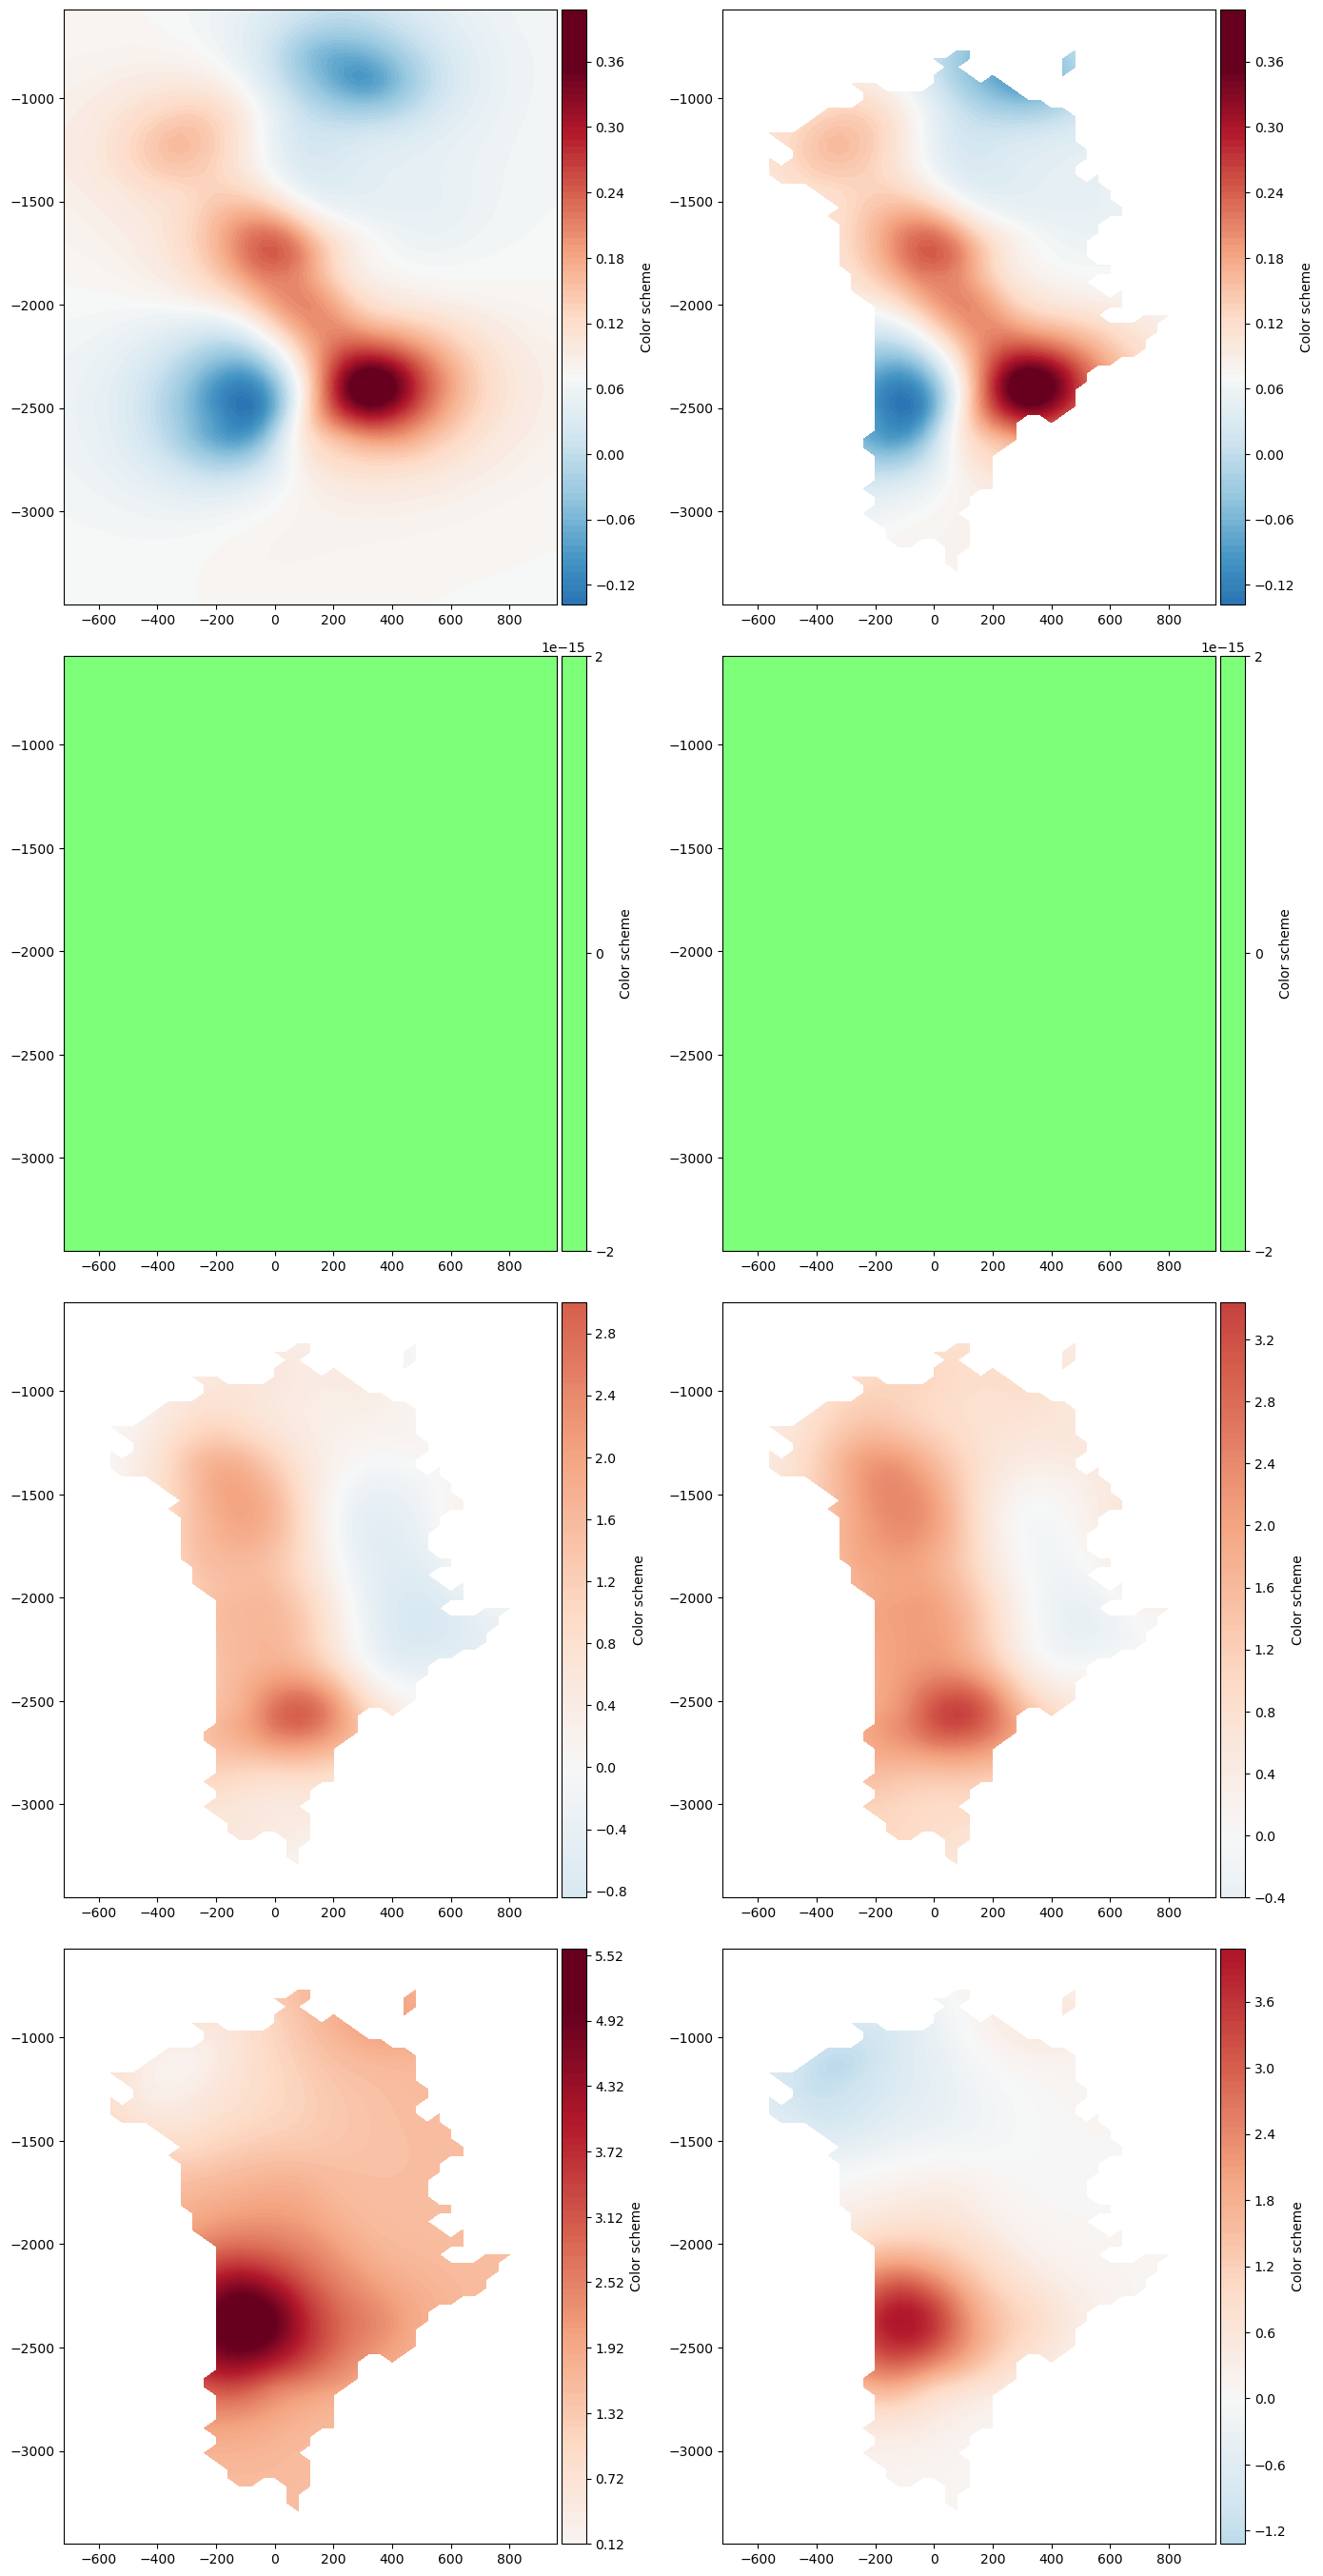

In [32]:
ds_surftemp = xr.load_dataset("/scratch2/shreyas/optim_AB_nodeltats_noconvinit_constrained_56/inexact_gn_hessian_cg/state_GNHessCG_iter_18.nc")
ds_surftemp_0 = xr.load_dataset("/scratch2/shreyas/optim_AB_nodeltats_noconvinit_constrained_13/inexact_gn_hessian_cg/state_GNHessCG_iter_0.nc")

H_data_40 = xr.open_dataset("/scratch2/shreyas/GrIS_paleo_data/bm5_data_40kms.nc")
H_data = H_data_40["H"].data
mask = 1.0*(H_data > 0)
mask[mask == 0] = np.nan

# for i in range(ds_surftemp["xx_delta_tda"].data.shape[0]):
#     print(f"{-11000 + 100*i} a, {np.linalg.norm(ds_surftemp['xx_delta_tda'].data[i]-ds_surftemp_0['xx_delta_tda'].data[i])}")

n_rows, n_cols = 4, 2
aspect_ratio = len(xModel40)/len(yModel40)
subplot_width = 4
subplot_height = subplot_width / aspect_ratio
plt.rcParams["figure.figsize"] = ((n_cols+1.5)*subplot_width, n_rows*subplot_height)
fig, ax = plt.subplots(n_rows, n_cols)

fancyPlotter.plot_normal(xModel40, 
                         yModel40, 
                         ds_surftemp["xx_gamma_s"].data,
                         cmap = 'RdBu_r', vmin = -0.0704582*3, vmax = 0.0704582*5, nbins = 100, fig = fig, ax = ax[0, 0])
fancyPlotter.plot_normal(xModel40, 
                         yModel40, 
                         ds_surftemp["xx_gamma_s"].data*mask,
                         cmap = 'RdBu_r', vmin = -0.0704582*3, vmax = 0.0704582*5, nbins = 100, fig = fig, ax = ax[0, 1])
fancyPlotter.plot_normal(xModel40, 
                         yModel40, 
                         10**ds_surftemp["xx_age_c"].data[40] - 10**ds_surftemp_0["xx_age_c"].data[40],
                         cmap = 'jet', vmin = -250, vmax = 250, nbins = 100, fig = fig, ax = ax[1, 0])
fancyPlotter.plot_normal(xModel40, 
                         yModel40, 
                         10**ds_surftemp["xx_age_c"].data[-1] - 10**ds_surftemp_0["xx_age_c"].data[-1],
                         cmap = 'jet', vmin = -250, vmax = 250, nbins = 100, fig = fig, ax = ax[1, 1])
fancyPlotter.plot_normal(xModel40, 
                         yModel40, 
                         (ds_surftemp["xx_delta_tda"].data[-2])*mask,
                         cmap = 'RdBu_r', vmin = -5, vmax = 5, nbins = 100, fig = fig, ax = ax[2, 0])
fancyPlotter.plot_normal(xModel40, 
                         yModel40, 
                         (ds_surftemp["xx_delta_tda"].data[-2]-ds_surftemp_0['xx_delta_tda'].data[-2])*mask,
                         cmap = 'RdBu_r',vmin = -5, vmax = 5, nbins = 100, fig = fig, ax = ax[2, 1])
fancyPlotter.plot_normal(xModel40, 
                         yModel40, 
                         (ds_surftemp["xx_delta_tda"].data[-75])*mask,
                         cmap = 'RdBu_r', vmin = -5, vmax = 5, nbins = 100, fig = fig, ax = ax[3, 0])
fancyPlotter.plot_normal(xModel40, 
                         yModel40, 
                         (ds_surftemp["xx_delta_tda"].data[-75]-ds_surftemp_0['xx_delta_tda'].data[-75])*mask,
                         cmap = 'RdBu_r', vmin = -5, vmax = 5, nbins = 100, fig = fig, ax = ax[3, 1])

plt.tight_layout()

H_data = H_data_40["H"].data
mask = 1.0*(H_data > 0)

for var in ds_surftemp:
    print(var, np.linalg.norm(ds_surftemp_0[var].data), np.linalg.norm(ds_surftemp[var].data))

np.min(ds_surftemp['xx_delta_tda'].data-ds_surftemp_0['xx_delta_tda'].data), np.max(ds_surftemp['xx_delta_tda'].data-ds_surftemp_0['xx_delta_tda'].data)

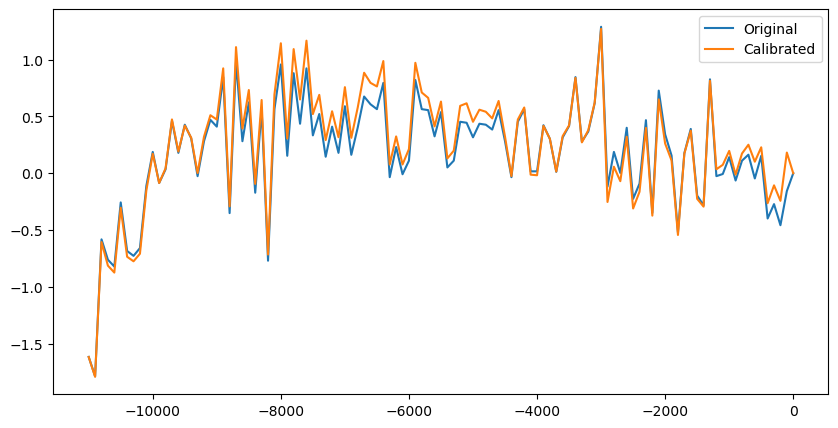

In [22]:
plt.rcParams["figure.figsize"] = (10, 5)
plt.plot(np.arange(-11000, 100, 100), np.mean(ds_surftemp_0['xx_delta_tda'].data*mask, axis = (1, 2)), label = "Original")
plt.plot(np.arange(-11000, 100, 100), np.mean(ds_surftemp['xx_delta_tda'].data*mask, axis = (1, 2)), label = "Calibrated")
# plt.plot(np.arange(-11000, 100, 100), np.max(ds_surftemp['xx_delta_tda'].data*mask, axis = (1, 2)), label = "Calibrated max")
# plt.plot(np.arange(-11000, 100, 100), np.min(ds_surftemp['xx_delta_tda'].data*mask, axis = (1, 2)), label = "Calibrated min")

plt.legend()

(array([4.2927514]),
 array([5.]),
 array([2.50170237]),
 array([2.73]),
 array([14.11531046]),
 array([7.28]),
 array([0.6748531]),
 array([0.6]),
 array([10.05935477]),
 array([9.7155]),
 array([ 0.459, -0.128,  0.431, -1.117, -0.762, -1.283, -0.44 ,  0.   ],
       dtype=float32),
 array([ 0.45899999, -0.12800001,  0.43099999, -1.11699998, -0.76200002,
        -1.28299999, -0.44      ,  0.        ]),
 array([ 0.68846965,  0.20027332,  0.59324014, -0.81653221, -0.41348285,
        -0.86904329,  0.18853854,  0.        ]))

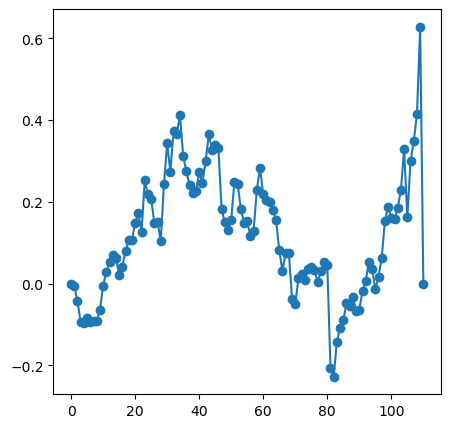

In [31]:
plt.rcParams["figure.figsize"] = (5, 5)
plt.scatter(np.arange(111), np.mean(ds_surftemp['xx_delta_tda'].data, axis = (1, 2))-np.mean(ds_surftemp_0['xx_delta_tda'].data, axis = (1, 2)))
plt.plot(np.mean(ds_surftemp['xx_delta_tda'].data, axis = (1, 2))-np.mean(ds_surftemp_0['xx_delta_tda'].data, axis = (1, 2)))

10**ds_surftemp["xx_s_stat"].data, 10**ds_surftemp_0["xx_s_stat"].data,\
10**ds_surftemp["xx_beta1"].data, 10**ds_surftemp_0["xx_beta1"].data,\
10**ds_surftemp["xx_beta2"].data, 10**ds_surftemp_0["xx_beta2"].data,\
10**ds_surftemp["xx_Pmax"].data, 10**ds_surftemp_0["xx_Pmax"].data,\
10**ds_surftemp["xx_mu"].data, 10**ds_surftemp_0["xx_mu"].data, \
ds_ser_grl40_bm5_paleo17a_CT4_BH0_8point5CS_spinup_0ka["delta_ts"].data[6665::5], \
np.mean(ds_surftemp_0['xx_delta_tda'].data, axis = (1, 2))[103:], \
np.mean(ds_surftemp['xx_delta_tda'].data, axis = (1, 2))[103:]

xx_c_slide_init 18.49164736194716 18.49164736194716
xx_c_dis_da 4.194764024110887 4.194764024110887
xx_q_geo 71.13209299124598 71.13209299124598
xx_gamma_s 3.947534816717385 5.563024242472095
xx_s_stat 0.6989700043360189 0.6927340020491853
xx_beta1 0.436162647040756 0.4286190260139305
xx_beta2 0.8621313793130372 0.9766201536393209
xx_Pmax 0.22184874961635637 0.22029374373944716
xx_mu 0.9874651561095745 0.994304213213069
xx_age_c 1450.7748 1450.7748
xx_delta_tda 853.774849677635 995.1210734528877


(-5.520336460391905, 9.703766322535175)

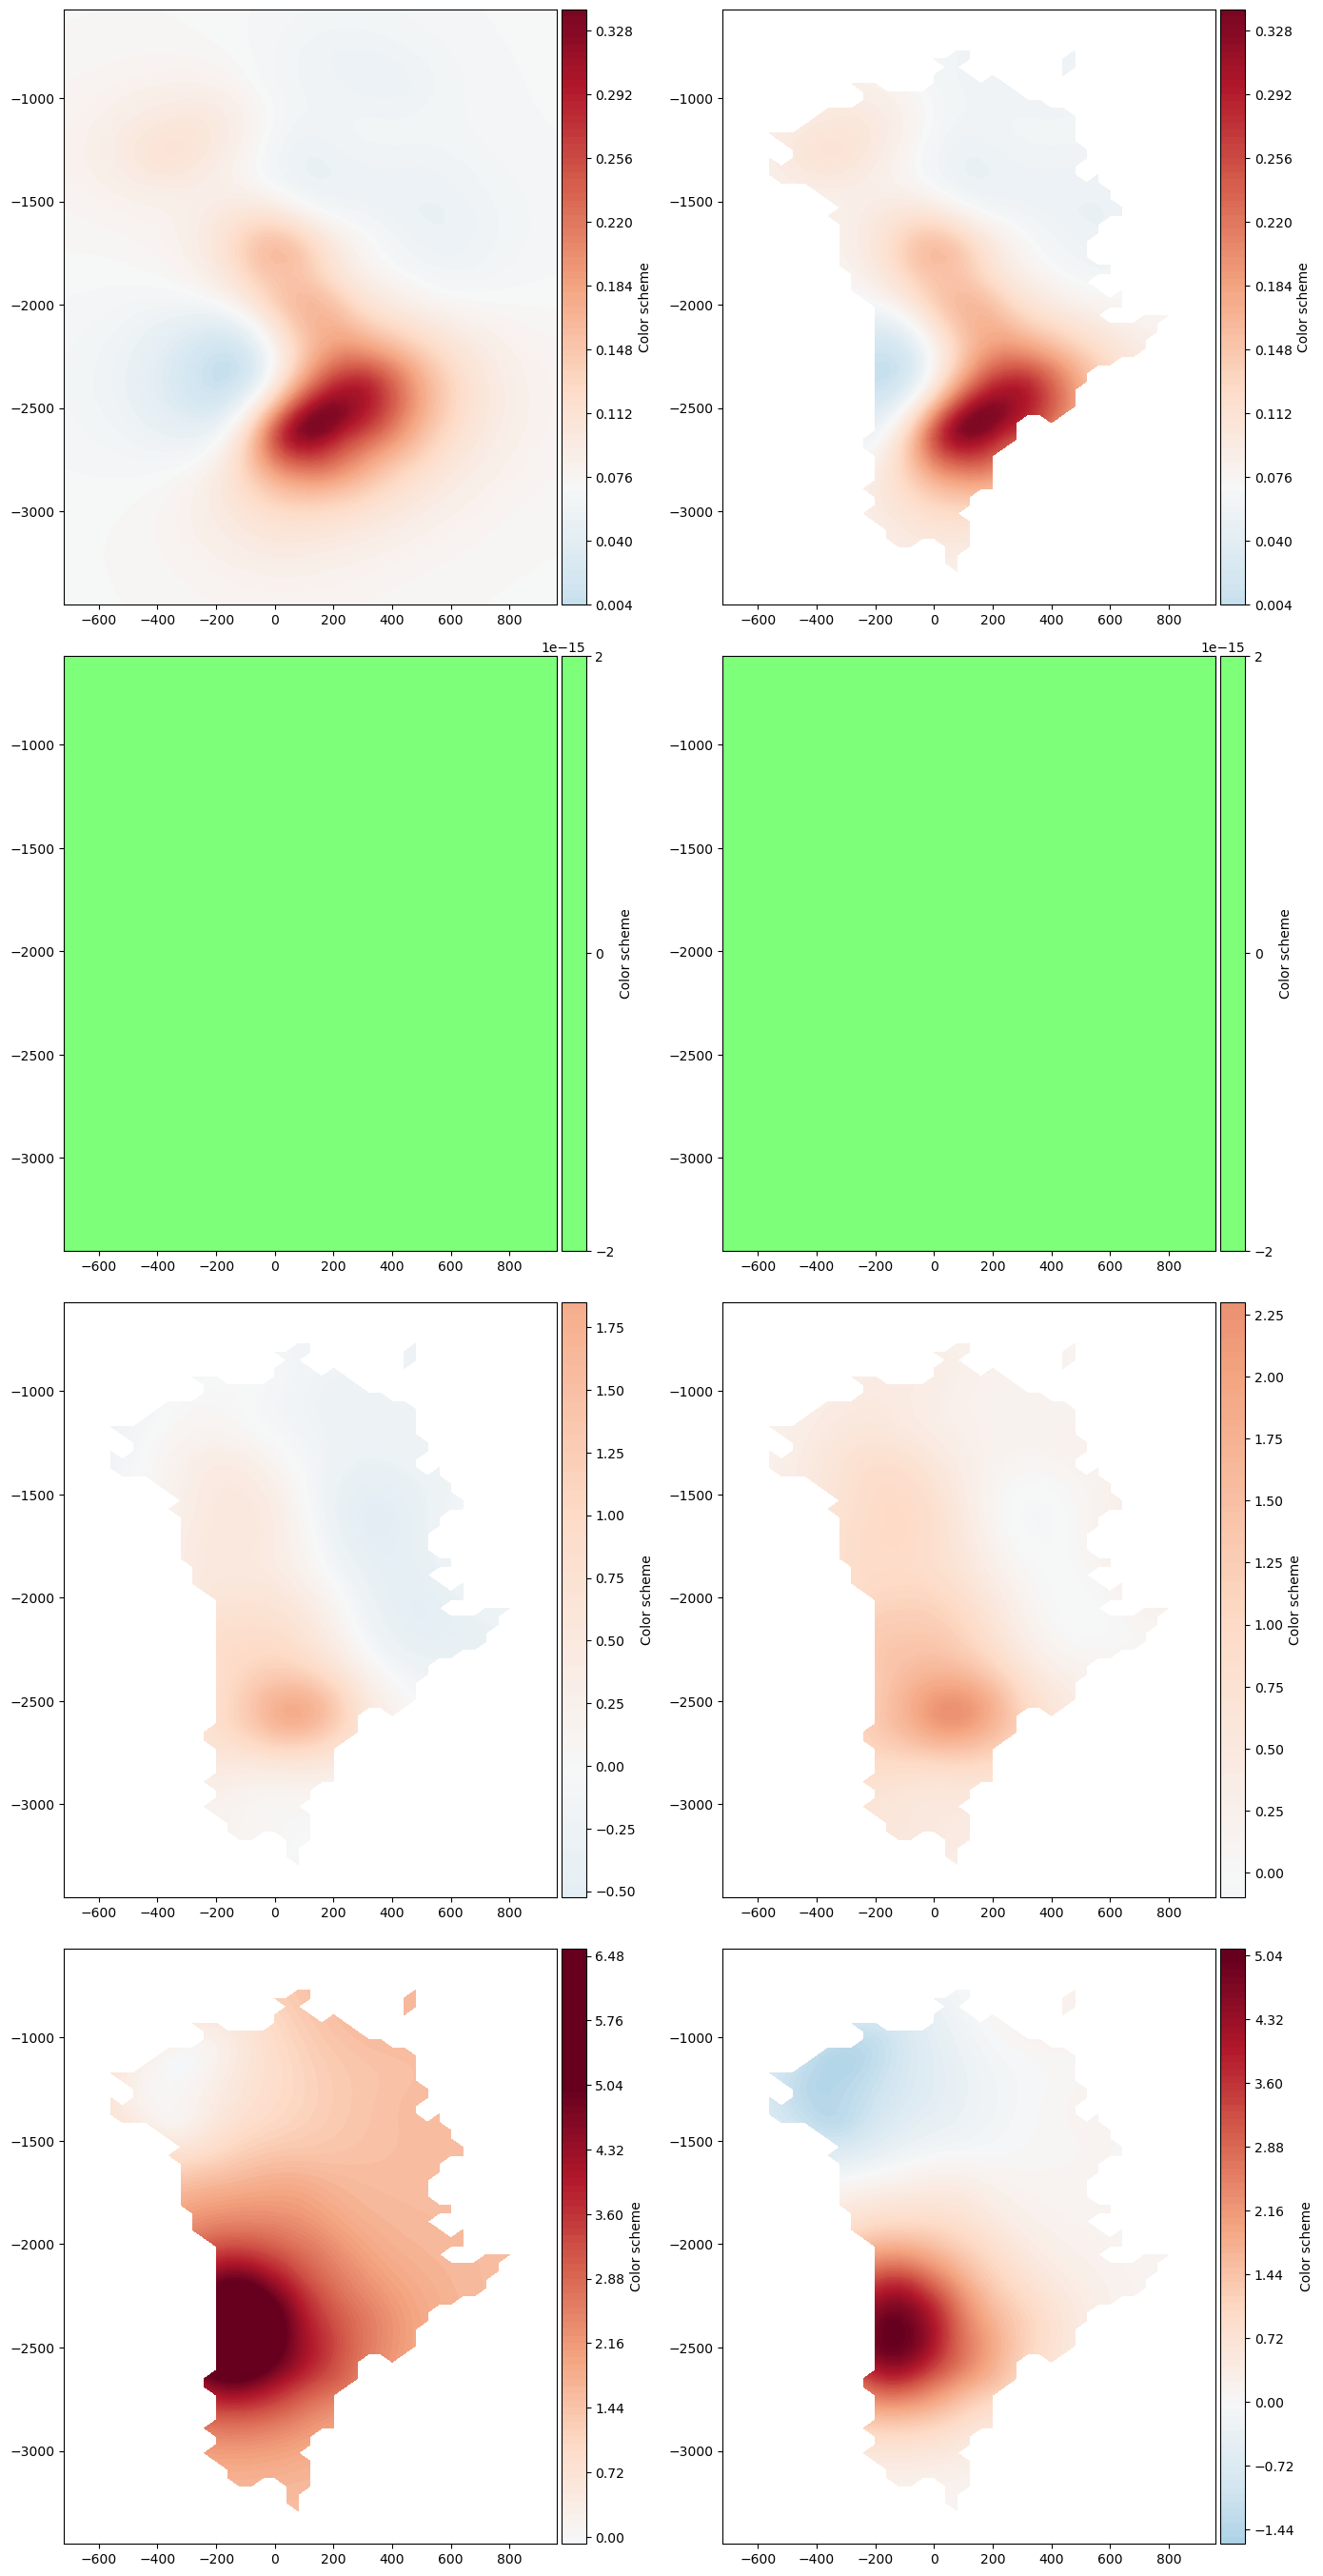

In [29]:
ds_surftemp = xr.load_dataset("/scratch2/shreyas/optim_AB_nodeltats_noconvinit_constrained_51/inexact_gn_hessian_cg/state_GNHessCG_iter_30.nc")
ds_surftemp_0 = xr.load_dataset("/scratch2/shreyas/optim_AB_nodeltats_noconvinit_constrained_13/inexact_gn_hessian_cg/state_GNHessCG_iter_0.nc")

H_data_40 = xr.open_dataset("/scratch2/shreyas/GrIS_paleo_data/bm5_data_40kms.nc")
H_data = H_data_40["H"].data
mask = 1.0*(H_data > 0)
mask[mask == 0] = np.nan

# for i in range(ds_surftemp["xx_delta_tda"].data.shape[0]):
#     print(f"{-11000 + 100*i} a, {np.linalg.norm(ds_surftemp['xx_delta_tda'].data[i]-ds_surftemp_0['xx_delta_tda'].data[i])}")

n_rows, n_cols = 4, 2
aspect_ratio = len(xModel40)/len(yModel40)
subplot_width = 4
subplot_height = subplot_width / aspect_ratio
plt.rcParams["figure.figsize"] = ((n_cols+1.5)*subplot_width, n_rows*subplot_height)
fig, ax = plt.subplots(n_rows, n_cols)

fancyPlotter.plot_normal(xModel40, 
                         yModel40, 
                         ds_surftemp["xx_gamma_s"].data,
                         cmap = 'RdBu_r', vmin = -0.0704582*3, vmax = 0.0704582*5, nbins = 100, fig = fig, ax = ax[0, 0])
fancyPlotter.plot_normal(xModel40, 
                         yModel40, 
                         ds_surftemp["xx_gamma_s"].data*mask,
                         cmap = 'RdBu_r', vmin = -0.0704582*3, vmax = 0.0704582*5, nbins = 100, fig = fig, ax = ax[0, 1])
fancyPlotter.plot_normal(xModel40, 
                         yModel40, 
                         10**ds_surftemp["xx_age_c"].data[40] - 10**ds_surftemp_0["xx_age_c"].data[40],
                         cmap = 'jet', vmin = -250, vmax = 250, nbins = 100, fig = fig, ax = ax[1, 0])
fancyPlotter.plot_normal(xModel40, 
                         yModel40, 
                         10**ds_surftemp["xx_age_c"].data[-1] - 10**ds_surftemp_0["xx_age_c"].data[-1],
                         cmap = 'jet', vmin = -250, vmax = 250, nbins = 100, fig = fig, ax = ax[1, 1])
fancyPlotter.plot_normal(xModel40, 
                         yModel40, 
                         (ds_surftemp["xx_delta_tda"].data[-2])*mask,
                         cmap = 'RdBu_r', vmin = -5, vmax = 5, nbins = 100, fig = fig, ax = ax[2, 0])
fancyPlotter.plot_normal(xModel40, 
                         yModel40, 
                         (ds_surftemp["xx_delta_tda"].data[-2]-ds_surftemp_0['xx_delta_tda'].data[-2])*mask,
                         cmap = 'RdBu_r',vmin = -5, vmax = 5, nbins = 100, fig = fig, ax = ax[2, 1])
fancyPlotter.plot_normal(xModel40, 
                         yModel40, 
                         (ds_surftemp["xx_delta_tda"].data[-75])*mask,
                         cmap = 'RdBu_r', vmin = -5, vmax = 5, nbins = 100, fig = fig, ax = ax[3, 0])
fancyPlotter.plot_normal(xModel40, 
                         yModel40, 
                         (ds_surftemp["xx_delta_tda"].data[-75]-ds_surftemp_0['xx_delta_tda'].data[-75])*mask,
                         cmap = 'RdBu_r', vmin = -5, vmax = 5, nbins = 100, fig = fig, ax = ax[3, 1])

plt.tight_layout()

H_data = H_data_40["H"].data
mask = 1.0*(H_data > 0)

for var in ds_surftemp:
    print(var, np.linalg.norm(ds_surftemp_0[var].data), np.linalg.norm(ds_surftemp[var].data))

np.min(ds_surftemp['xx_delta_tda'].data), np.max(ds_surftemp['xx_delta_tda'].data)

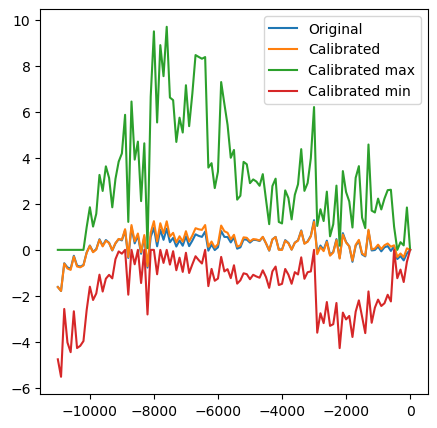

In [33]:
plt.rcParams["figure.figsize"] = (5, 5)
plt.plot(np.arange(-11000, 100, 100), np.mean(ds_surftemp_0['xx_delta_tda'].data*mask, axis = (1, 2)), label = "Original")
plt.plot(np.arange(-11000, 100, 100), np.mean(ds_surftemp['xx_delta_tda'].data*mask, axis = (1, 2)), label = "Calibrated")
plt.plot(np.arange(-11000, 100, 100), np.max(ds_surftemp['xx_delta_tda'].data*mask, axis = (1, 2)), label = "Calibrated max")
plt.plot(np.arange(-11000, 100, 100), np.min(ds_surftemp['xx_delta_tda'].data*mask, axis = (1, 2)), label = "Calibrated min")

plt.legend()

(array([4.92871836]),
 array([5.]),
 array([2.68298983]),
 array([2.73]),
 array([9.47589312]),
 array([7.28]),
 array([0.60215217]),
 array([0.6]),
 array([9.86970594]),
 array([9.7155]),
 array([ 0.459, -0.128,  0.431, -1.117, -0.762, -1.283, -0.44 ,  0.   ],
       dtype=float32),
 array([ 0.45899999, -0.12800001,  0.43099999, -1.11699998, -0.76200002,
        -1.28299999, -0.44      ,  0.        ]),
 array([ 0.70575348,  0.23119438,  0.5206003 , -0.93809396, -0.54640267,
        -1.03894203, -0.06416324,  0.        ]))

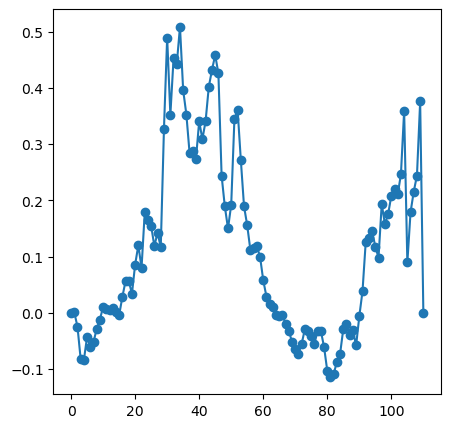

In [34]:
plt.rcParams["figure.figsize"] = (5, 5)
plt.scatter(np.arange(111), np.mean(ds_surftemp['xx_delta_tda'].data, axis = (1, 2))-np.mean(ds_surftemp_0['xx_delta_tda'].data, axis = (1, 2)))
plt.plot(np.mean(ds_surftemp['xx_delta_tda'].data, axis = (1, 2))-np.mean(ds_surftemp_0['xx_delta_tda'].data, axis = (1, 2)))

10**ds_surftemp["xx_s_stat"].data, 10**ds_surftemp_0["xx_s_stat"].data,\
10**ds_surftemp["xx_beta1"].data, 10**ds_surftemp_0["xx_beta1"].data,\
10**ds_surftemp["xx_beta2"].data, 10**ds_surftemp_0["xx_beta2"].data,\
10**ds_surftemp["xx_Pmax"].data, 10**ds_surftemp_0["xx_Pmax"].data,\
10**ds_surftemp["xx_mu"].data, 10**ds_surftemp_0["xx_mu"].data, \
ds_ser_grl40_bm5_paleo17a_CT4_BH0_8point5CS_spinup_0ka["delta_ts"].data[6665::5], \
np.mean(ds_surftemp_0['xx_delta_tda'].data, axis = (1, 2))[103:], \
np.mean(ds_surftemp['xx_delta_tda'].data, axis = (1, 2))[103:]

xx_c_slide_init 18.49164736194716 18.49164736194716
xx_c_dis_da 4.194764024110887 4.194764024110887
xx_q_geo 71.13209299124598 71.13209299124598
xx_gamma_s 3.947534816717385 5.5364480405663805
xx_s_stat 0.6989700043360189 0.6388500276111159
xx_beta1 0.436162647040756 0.41476214037716136
xx_beta2 0.8621313793130372 1.054772088491204
xx_Pmax 0.22184874961635637 0.20540933537675507
xx_mu 0.9874651561095745 1.003192635691554
xx_age_c 1450.7748 1450.7572159591375
xx_delta_tda 853.774849677635 982.3864683243755


(-5.52739544264363, 8.538476418135275)

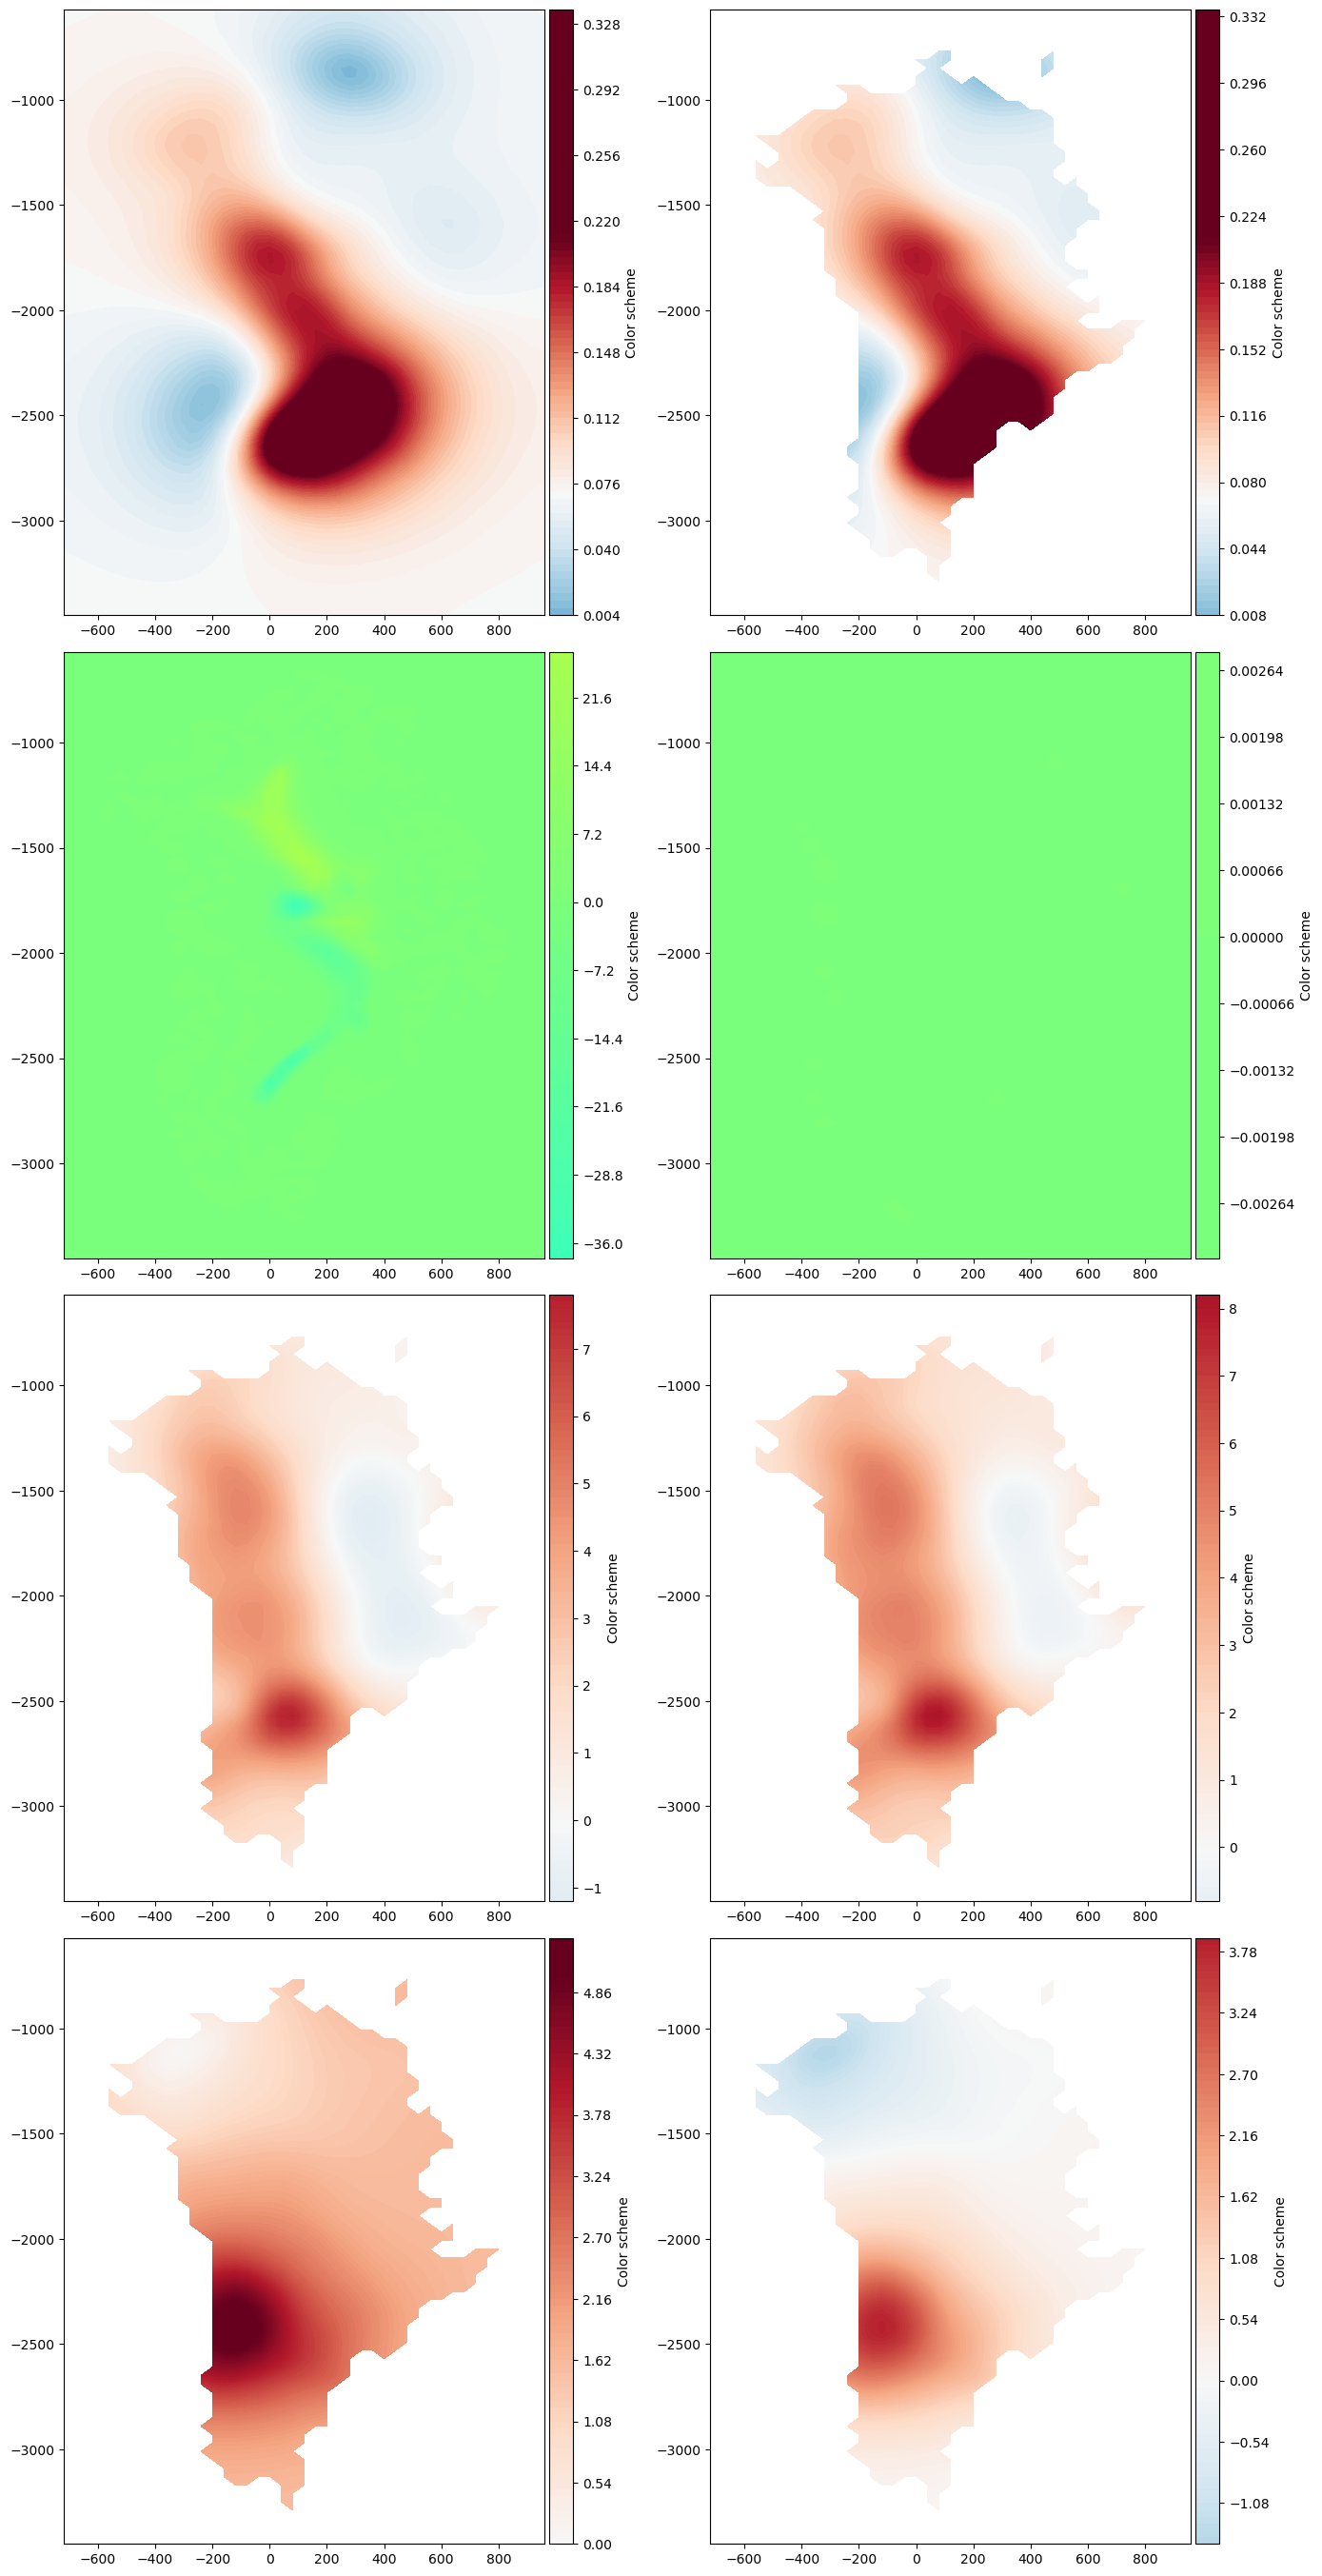

In [38]:
ds_surftemp = xr.load_dataset("/scratch2/shreyas/optim_AB_nodeltats_noconvinit_constrained_13/inexact_gn_hessian_cg/state_GNHessCG_iter_65.nc")
ds_surftemp_0 = xr.load_dataset("/scratch2/shreyas/optim_AB_nodeltats_noconvinit_constrained_13/inexact_gn_hessian_cg/state_GNHessCG_iter_0.nc")

H_data_40 = xr.open_dataset("/scratch2/shreyas/GrIS_paleo_data/bm5_data_40kms.nc")
H_data = H_data_40["H"].data
mask = 1.0*(H_data > 0)
mask[mask == 0] = np.nan

# for i in range(ds_surftemp["xx_delta_tda"].data.shape[0]):
#     print(f"{-11000 + 100*i} a, {np.linalg.norm(ds_surftemp['xx_delta_tda'].data[i]-ds_surftemp_0['xx_delta_tda'].data[i])}")

n_rows, n_cols = 4, 2
aspect_ratio = len(xModel40)/len(yModel40)
subplot_width = 4
subplot_height = subplot_width / aspect_ratio
plt.rcParams["figure.figsize"] = ((n_cols+1.5)*subplot_width, n_rows*subplot_height)
fig, ax = plt.subplots(n_rows, n_cols)

fancyPlotter.plot_normal(xModel40, 
                         yModel40, 
                         ds_surftemp["xx_gamma_s"].data,
                         cmap = 'RdBu_r', vmin = -0.0704582, vmax = 0.0704582*3, nbins = 100, fig = fig, ax = ax[0, 0])
fancyPlotter.plot_normal(xModel40, 
                         yModel40, 
                         ds_surftemp["xx_gamma_s"].data*mask,
                         cmap = 'RdBu_r', vmin = -0.0704582, vmax = 0.0704582*3, nbins = 100, fig = fig, ax = ax[0, 1])
fancyPlotter.plot_normal(xModel40, 
                         yModel40, 
                         10**ds_surftemp["xx_age_c"].data[40] - 10**ds_surftemp_0["xx_age_c"].data[40],
                         cmap = 'jet', vmin = -250, vmax = 250, nbins = 100, fig = fig, ax = ax[1, 0])
fancyPlotter.plot_normal(xModel40, 
                         yModel40, 
                         10**ds_surftemp["xx_age_c"].data[-1] - 10**ds_surftemp_0["xx_age_c"].data[-1],
                         cmap = 'jet', vmin = -250, vmax = 250, nbins = 100, fig = fig, ax = ax[1, 1])
fancyPlotter.plot_normal(xModel40, 
                         yModel40, 
                         (ds_surftemp["xx_delta_tda"].data[-2])*mask,
                         cmap = 'RdBu_r', vmin = -10, vmax = 10, nbins = 100, fig = fig, ax = ax[2, 0])
fancyPlotter.plot_normal(xModel40, 
                         yModel40, 
                         (ds_surftemp["xx_delta_tda"].data[-2]-ds_surftemp_0['xx_delta_tda'].data[-2])*mask,
                         cmap = 'RdBu_r',vmin = -10, vmax = 10, nbins = 100, fig = fig, ax = ax[2, 1])
fancyPlotter.plot_normal(xModel40, 
                         yModel40, 
                         (ds_surftemp["xx_delta_tda"].data[-75])*mask,
                         cmap = 'RdBu_r', vmin = -5, vmax = 5, nbins = 100, fig = fig, ax = ax[3, 0])
fancyPlotter.plot_normal(xModel40, 
                         yModel40, 
                         (ds_surftemp["xx_delta_tda"].data[-75]-ds_surftemp_0['xx_delta_tda'].data[-75])*mask,
                         cmap = 'RdBu_r', vmin = -5, vmax = 5, nbins = 100, fig = fig, ax = ax[3, 1])

plt.tight_layout()

H_data = H_data_40["H"].data
mask = 1.0*(H_data > 0)

for var in ds_surftemp:
    print(var, np.linalg.norm(ds_surftemp_0[var].data), np.linalg.norm(ds_surftemp[var].data))

np.min(ds_surftemp['xx_delta_tda'].data), np.max(ds_surftemp['xx_delta_tda'].data)

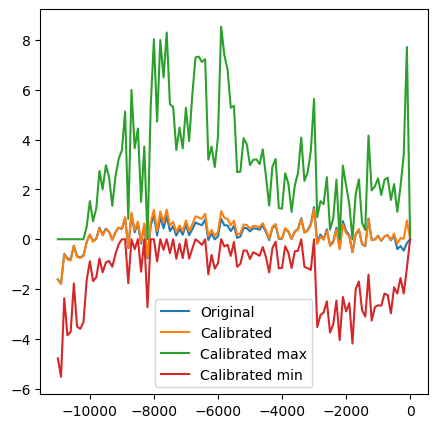

In [39]:
plt.rcParams["figure.figsize"] = (5, 5)
plt.plot(np.arange(-11000, 100, 100), np.mean(ds_surftemp_0['xx_delta_tda'].data*mask, axis = (1, 2)), label = "Original")
plt.plot(np.arange(-11000, 100, 100), np.mean(ds_surftemp['xx_delta_tda'].data*mask, axis = (1, 2)), label = "Calibrated")
plt.plot(np.arange(-11000, 100, 100), np.max(ds_surftemp['xx_delta_tda'].data*mask, axis = (1, 2)), label = "Calibrated max")
plt.plot(np.arange(-11000, 100, 100), np.min(ds_surftemp['xx_delta_tda'].data*mask, axis = (1, 2)), label = "Calibrated min")

plt.legend()

(array([4.35361507]),
 array([5.]),
 array([2.59873587]),
 array([2.73]),
 array([11.34415335]),
 array([7.28]),
 array([0.62314722]),
 array([0.6]),
 array([10.07378403]),
 array([9.7155]),
 array([ 0.459, -0.128,  0.431, -1.117, -0.762, -1.283, -0.44 ,  0.   ],
       dtype=float32),
 array([ 0.45899999, -0.12800001,  0.43099999, -1.11699998, -0.76200002,
        -1.28299999, -0.44      ,  0.        ]),
 array([ 0.55800197, -0.01465819,  0.64123412, -0.63574888, -0.13927357,
        -0.44391029,  1.12126003,  0.        ]))

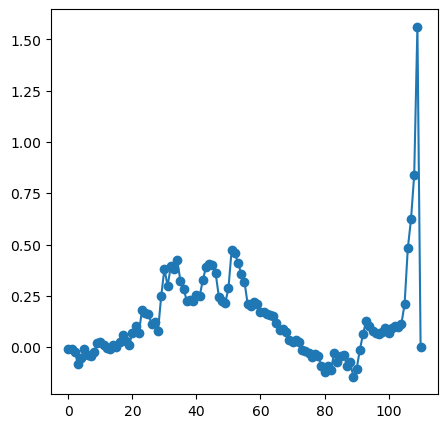

In [40]:
plt.rcParams["figure.figsize"] = (5, 5)
plt.scatter(np.arange(111), np.mean(ds_surftemp['xx_delta_tda'].data, axis = (1, 2))-np.mean(ds_surftemp_0['xx_delta_tda'].data, axis = (1, 2)))
plt.plot(np.mean(ds_surftemp['xx_delta_tda'].data, axis = (1, 2))-np.mean(ds_surftemp_0['xx_delta_tda'].data, axis = (1, 2)))

10**ds_surftemp["xx_s_stat"].data, 10**ds_surftemp_0["xx_s_stat"].data,\
10**ds_surftemp["xx_beta1"].data, 10**ds_surftemp_0["xx_beta1"].data,\
10**ds_surftemp["xx_beta2"].data, 10**ds_surftemp_0["xx_beta2"].data,\
10**ds_surftemp["xx_Pmax"].data, 10**ds_surftemp_0["xx_Pmax"].data,\
10**ds_surftemp["xx_mu"].data, 10**ds_surftemp_0["xx_mu"].data, \
ds_ser_grl40_bm5_paleo17a_CT4_BH0_8point5CS_spinup_0ka["delta_ts"].data[6665::5], \
np.mean(ds_surftemp_0['xx_delta_tda'].data, axis = (1, 2))[103:], \
np.mean(ds_surftemp['xx_delta_tda'].data, axis = (1, 2))[103:]

xx_c_slide_init 18.49164736194716 18.49164736194716
xx_c_dis_da 4.194764024110887 4.194764024110887
xx_q_geo 71.13209299124598 71.13209299124598
xx_gamma_s 3.947534816717385 3.9565127370020425
xx_s_stat 0.6989700043360189 0.4065094804755311
xx_beta1 0.436162647040756 0.6892418617517253
xx_beta2 0.8621313793130372 1.1843355641852729
xx_Pmax 0.22184874961635637 0.45844183397796223
xx_mu 0.9874651561095745 1.0620418061228762
xx_age_c 1450.7748 1450.7748
xx_delta_tda 853.774849677635 931.9847749031356


(-6.474663027030678, 9.140879327162498)

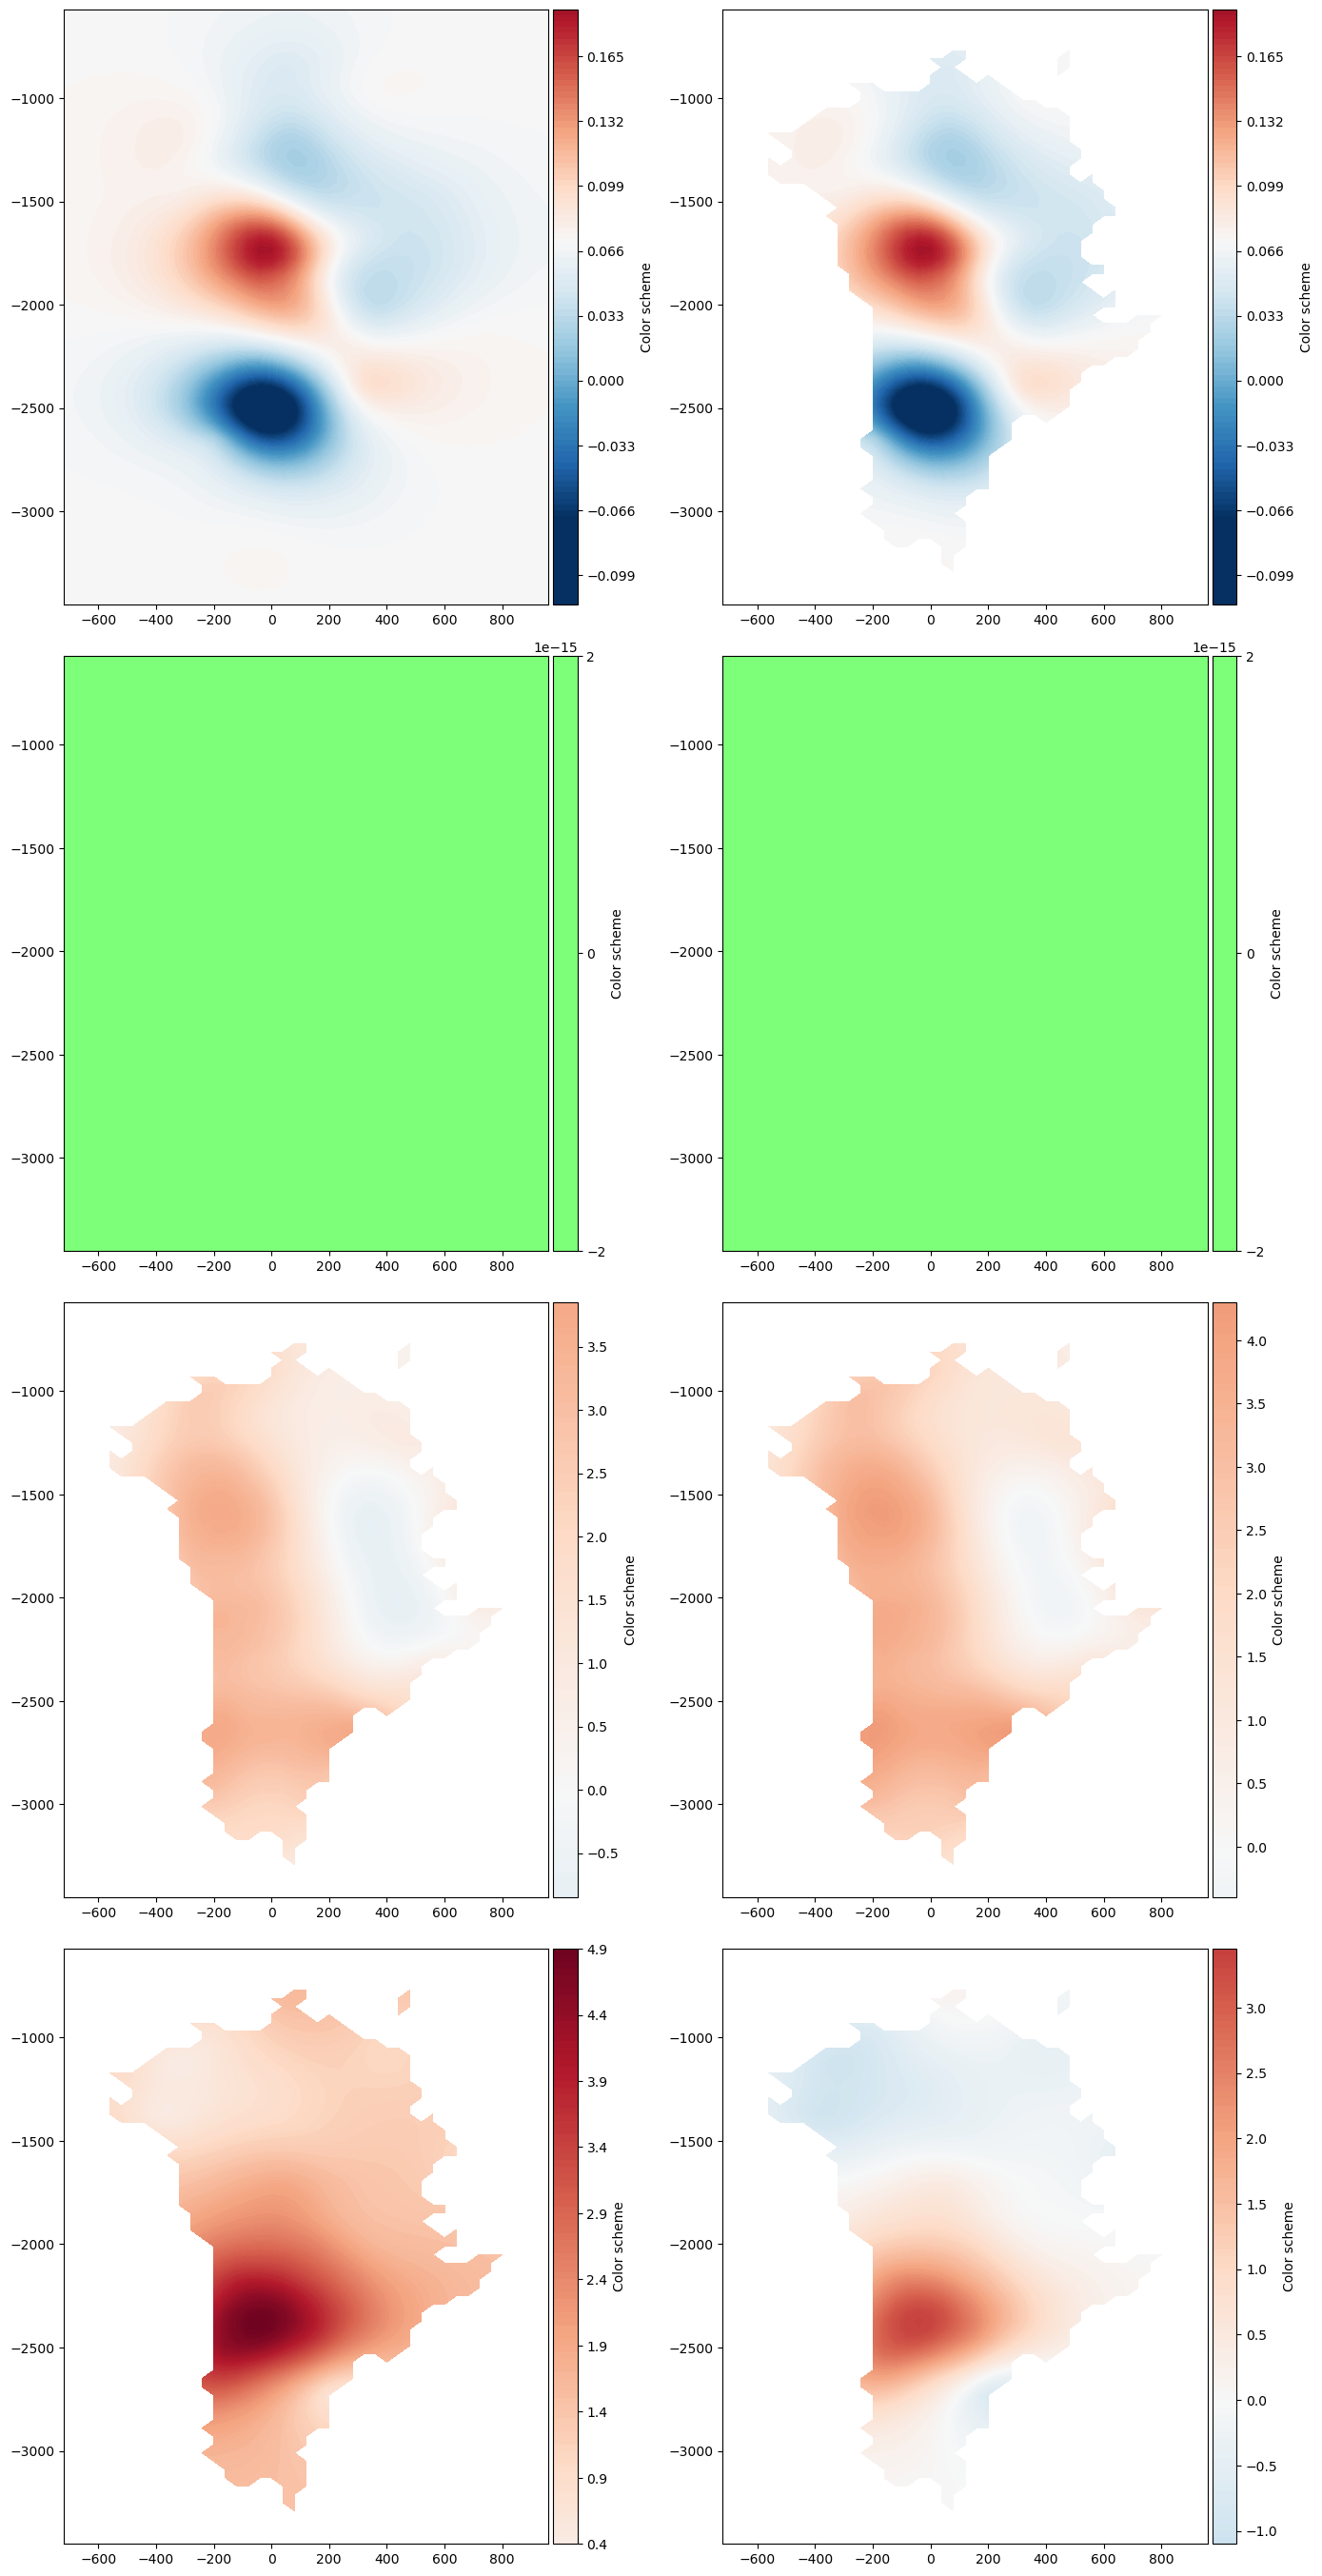

In [41]:
ds_surftemp = xr.load_dataset("/scratch2/shreyas/optim_AB_nodeltats_noconvinit_constrained_38/inexact_gn_hessian_cg/state_GNHessCG_iter_3.nc")
ds_surftemp_0 = xr.load_dataset("/scratch2/shreyas/optim_AB_nodeltats_noconvinit_constrained_13/inexact_gn_hessian_cg/state_GNHessCG_iter_0.nc")

H_data_40 = xr.open_dataset("/scratch2/shreyas/GrIS_paleo_data/bm5_data_40kms.nc")
H_data = H_data_40["H"].data
mask = 1.0*(H_data > 0)
mask[mask == 0] = np.nan

# for i in range(ds_surftemp["xx_delta_tda"].data.shape[0]):
#     print(f"{-11000 + 100*i} a, {np.linalg.norm(ds_surftemp['xx_delta_tda'].data[i]-ds_surftemp_0['xx_delta_tda'].data[i])}")

n_rows, n_cols = 4, 2
aspect_ratio = len(xModel40)/len(yModel40)
subplot_width = 4
subplot_height = subplot_width / aspect_ratio
plt.rcParams["figure.figsize"] = ((n_cols+1.5)*subplot_width, n_rows*subplot_height)
fig, ax = plt.subplots(n_rows, n_cols)

fancyPlotter.plot_normal(xModel40, 
                         yModel40, 
                         ds_surftemp["xx_gamma_s"].data,
                         cmap = 'RdBu_r', vmin = -0.0704582, vmax = 0.0704582*3, nbins = 100, fig = fig, ax = ax[0, 0])
fancyPlotter.plot_normal(xModel40, 
                         yModel40, 
                         ds_surftemp["xx_gamma_s"].data*mask,
                         cmap = 'RdBu_r', vmin = -0.0704582, vmax = 0.0704582*3, nbins = 100, fig = fig, ax = ax[0, 1])
fancyPlotter.plot_normal(xModel40, 
                         yModel40, 
                         10**ds_surftemp["xx_age_c"].data[40] - 10**ds_surftemp_0["xx_age_c"].data[40],
                         cmap = 'jet', vmin = -250, vmax = 250, nbins = 100, fig = fig, ax = ax[1, 0])
fancyPlotter.plot_normal(xModel40, 
                         yModel40, 
                         10**ds_surftemp["xx_age_c"].data[-1] - 10**ds_surftemp_0["xx_age_c"].data[-1],
                         cmap = 'jet', vmin = -250, vmax = 250, nbins = 100, fig = fig, ax = ax[1, 1])
fancyPlotter.plot_normal(xModel40, 
                         yModel40, 
                         (ds_surftemp["xx_delta_tda"].data[-2])*mask,
                         cmap = 'RdBu_r', vmin = -10, vmax = 10, nbins = 100, fig = fig, ax = ax[2, 0])
fancyPlotter.plot_normal(xModel40, 
                         yModel40, 
                         (ds_surftemp["xx_delta_tda"].data[-2]-ds_surftemp_0['xx_delta_tda'].data[-2])*mask,
                         cmap = 'RdBu_r',vmin = -10, vmax = 10, nbins = 100, fig = fig, ax = ax[2, 1])
fancyPlotter.plot_normal(xModel40, 
                         yModel40, 
                         (ds_surftemp["xx_delta_tda"].data[-75])*mask,
                         cmap = 'RdBu_r', vmin = -5, vmax = 5, nbins = 100, fig = fig, ax = ax[3, 0])
fancyPlotter.plot_normal(xModel40, 
                         yModel40, 
                         (ds_surftemp["xx_delta_tda"].data[-75]-ds_surftemp_0['xx_delta_tda'].data[-75])*mask,
                         cmap = 'RdBu_r', vmin = -5, vmax = 5, nbins = 100, fig = fig, ax = ax[3, 1])

plt.tight_layout()

H_data = H_data_40["H"].data
mask = 1.0*(H_data > 0)

for var in ds_surftemp:
    print(var, np.linalg.norm(ds_surftemp_0[var].data), np.linalg.norm(ds_surftemp[var].data))

np.min(ds_surftemp['xx_delta_tda'].data), np.max(ds_surftemp['xx_delta_tda'].data)

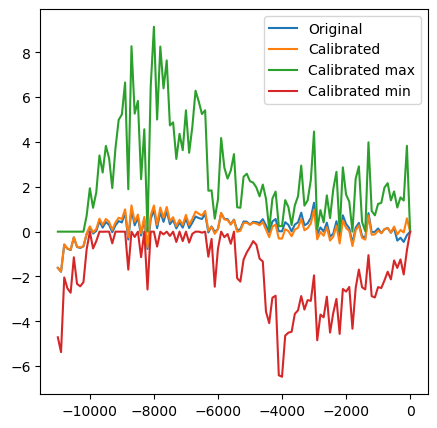

In [42]:
plt.rcParams["figure.figsize"] = (5, 5)
plt.plot(np.arange(-11000, 100, 100), np.mean(ds_surftemp_0['xx_delta_tda'].data*mask, axis = (1, 2)), label = "Original")
plt.plot(np.arange(-11000, 100, 100), np.mean(ds_surftemp['xx_delta_tda'].data*mask, axis = (1, 2)), label = "Calibrated")
plt.plot(np.arange(-11000, 100, 100), np.max(ds_surftemp['xx_delta_tda'].data*mask, axis = (1, 2)), label = "Calibrated max")
plt.plot(np.arange(-11000, 100, 100), np.min(ds_surftemp['xx_delta_tda'].data*mask, axis = (1, 2)), label = "Calibrated min")

plt.legend()

(array([2.54981975]),
 array([5.]),
 array([4.88924569]),
 array([2.73]),
 array([15.28746811]),
 array([7.28]),
 array([0.34798311]),
 array([0.6]),
 array([11.53564297]),
 array([9.7155]),
 array([ 0.459, -0.128,  0.431, -1.117, -0.762, -1.283, -0.44 ,  0.   ],
       dtype=float32),
 array([ 0.45899999, -0.12800001,  0.43099999, -1.11699998, -0.76200002,
        -1.28299999, -0.44      ,  0.        ]),
 array([ 0.55153205, -0.00776776,  0.68837557, -0.45639981,  0.0172026 ,
        -0.42410186,  1.02217573,  0.        ]))

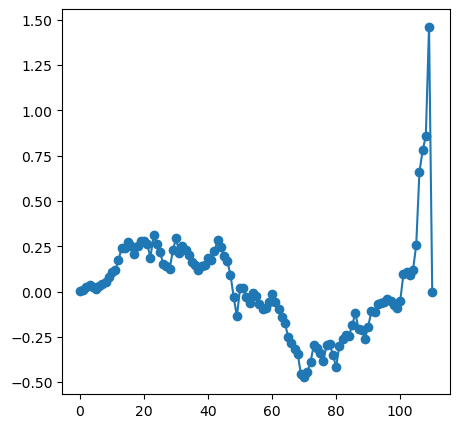

In [43]:
plt.rcParams["figure.figsize"] = (5, 5)
plt.scatter(np.arange(111), np.mean(ds_surftemp['xx_delta_tda'].data, axis = (1, 2))-np.mean(ds_surftemp_0['xx_delta_tda'].data, axis = (1, 2)))
plt.plot(np.mean(ds_surftemp['xx_delta_tda'].data, axis = (1, 2))-np.mean(ds_surftemp_0['xx_delta_tda'].data, axis = (1, 2)))

10**ds_surftemp["xx_s_stat"].data, 10**ds_surftemp_0["xx_s_stat"].data,\
10**ds_surftemp["xx_beta1"].data, 10**ds_surftemp_0["xx_beta1"].data,\
10**ds_surftemp["xx_beta2"].data, 10**ds_surftemp_0["xx_beta2"].data,\
10**ds_surftemp["xx_Pmax"].data, 10**ds_surftemp_0["xx_Pmax"].data,\
10**ds_surftemp["xx_mu"].data, 10**ds_surftemp_0["xx_mu"].data, \
ds_ser_grl40_bm5_paleo17a_CT4_BH0_8point5CS_spinup_0ka["delta_ts"].data[6665::5], \
np.mean(ds_surftemp_0['xx_delta_tda'].data, axis = (1, 2))[103:], \
np.mean(ds_surftemp['xx_delta_tda'].data, axis = (1, 2))[103:]

3.675

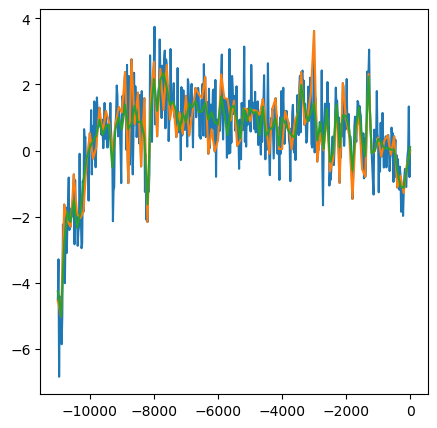

In [46]:
plt.rcParams["figure.figsize"] = (5, 5)

start_idx = np.where(ds_ser_grl40_bm5_paleo17a_CT4_BH0_8point5CS_spinup_0ka["t"].data == -11000)[0][0]
averaged_delta_ts = ds_ser_grl40_bm5_paleo17a_CT4_BH0_8point5CS_spinup_0ka["delta_ts"].data[start_idx::5].copy()

for i in range(110):
    averaged_delta_ts[i] = np.mean(ds_ser_grl40_bm5_paleo17a_CT4_BH0_8point5CS_spinup_0ka["delta_ts"].data[start_idx + 5*i - 2 : start_idx + 5*i + 3])

averaged_delta_ts[-1] = 0.0

plt.plot(ds_ser_grl40_bm5_paleo17a_CT4_BH0_8point5CS_spinup_0ka["t"].data[start_idx:], ds_ser_grl40_bm5_paleo17a_CT4_BH0_8point5CS_spinup_0ka["delta_ts"].data[start_idx:])
plt.plot(ds_ser_grl40_bm5_paleo17a_CT4_BH0_8point5CS_spinup_0ka["t"].data[start_idx::5], ds_ser_grl40_bm5_paleo17a_CT4_BH0_8point5CS_spinup_0ka["delta_ts"].data[start_idx::5])
plt.plot(ds_ser_grl40_bm5_paleo17a_CT4_BH0_8point5CS_spinup_0ka["t"].data[start_idx::5], averaged_delta_ts)

np.max(np.abs(ds_ser_grl40_bm5_paleo17a_CT4_BH0_8point5CS_spinup_0ka["delta_ts"].data[start_idx+1:]-ds_ser_grl40_bm5_paleo17a_CT4_BH0_8point5CS_spinup_0ka["delta_ts"].data[start_idx:-1]))

(6.84, 0.9031435)

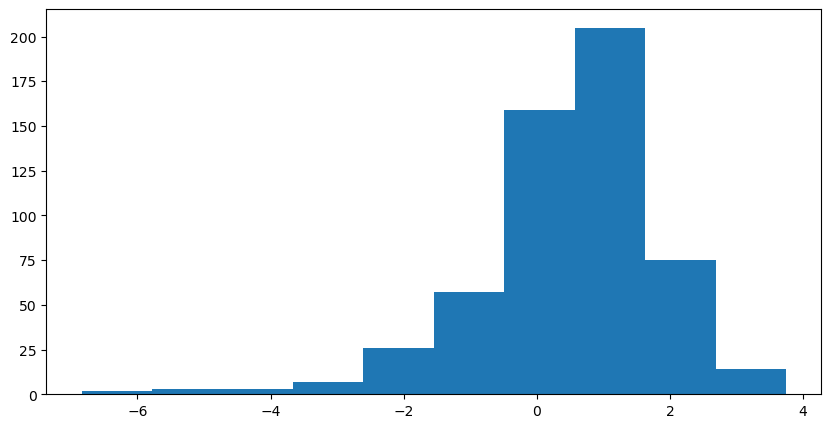

In [38]:
start_idx = np.where(ds_ser_grl40_bm5_paleo17a_CT4_BH0_8point5CS_spinup_0ka["t"].data == -11000)[0][0]
plt.hist(ds_ser_grl40_bm5_paleo17a_CT4_BH0_8point5CS_spinup_0ka["delta_ts"].data[start_idx:])
np.max(np.abs(ds_ser_grl40_bm5_paleo17a_CT4_BH0_8point5CS_spinup_0ka["delta_ts"].data[start_idx:])),\
np.std(np.abs(ds_ser_grl40_bm5_paleo17a_CT4_BH0_8point5CS_spinup_0ka["delta_ts"].data[start_idx:]))

1.976

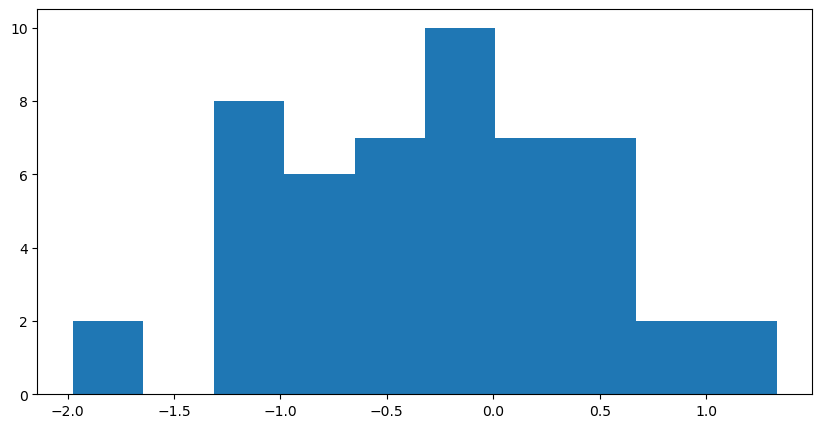

In [36]:
start_idx = np.where(ds_ser_grl40_bm5_paleo17a_CT4_BH0_8point5CS_spinup_0ka["t"].data == -1000)[0][0]
plt.hist(ds_ser_grl40_bm5_paleo17a_CT4_BH0_8point5CS_spinup_0ka["delta_ts"].data[start_idx:])
np.max(np.abs(ds_ser_grl40_bm5_paleo17a_CT4_BH0_8point5CS_spinup_0ka["delta_ts"].data[start_idx:]))

In [11]:
ds_prior_X = xr.open_dataset("/scratch2/shreyas/optim_AB_nodeltats_noconvinit_constrained_13/prior_X.nc")
ds_prior_X_new = ds_prior_X.copy()

ds = ds_prior_X_new.copy()
n_new = 551
new_time = np.arange(n_new)

# 1) Find variables that depend on time_ad and stash their data & dims
time_vars = [v for v in ds.data_vars if 'time_ad' in ds[v].dims]
stash = {v: (ds[v].dims, ds[v].data) for v in time_vars}

# 2) Drop those vars and change the coordinate safely
ds = ds.drop_vars(time_vars)
ds = ds.assign_coords(time_ad=new_time)

# 3) Recreate each time-dependent var by repeating along time_ad
for v, (dims, arr_old) in stash.items():
    # assume time_ad is the first dim (as in xx_delta_tdad: (time_ad, y, x))
    n_old = arr_old.shape[dims.index('time_ad')]
    rep = int(np.ceil(n_new / n_old))
    arr_new = np.concatenate([arr_old] * rep, axis=dims.index('time_ad'))[:n_new]
    ds[v] = (dims, arr_new)

# put it back
ds_prior_X_new = ds.copy()

# quick sanity check
print(ds_prior_X_new.sizes['time_ad'])        # 551
print(ds_prior_X_new['xx_delta_tdad'].shape)  # (551, y, x)

# ds_prior_X_new.to_netcdf("/scratch2/shreyas/prior_X_551.nc")

551
(551, 73, 43)


PermissionError: [Errno 13] Permission denied: '/scratch2/shreyas/prior_X_551.nc'

In [ ]:
gripdata = np.loadtxt("/home/shreyas/update_to_develop_sicopolis/sicopolis_spinups_develop/sico_in/general/NGRIP_GICC05modelext_Delta-Ts_max-eem-4.5_GISP2_GT4000Kobashi.dat")
gripdata_trunc_11000 = gripdata[128990:-3]
plt.plot(gripdata_trunc_11000[:, 0], gripdata_trunc_11000[:, 1])
plt.plot(ds_ser_grl40_bm5_paleo17a_CT4_BH0_8point5CS_spinup_0ka["t"].data[start_idx:], 
         ds_ser_grl40_bm5_paleo17a_CT4_BH0_8point5CS_spinup_0ka["delta_ts"].data[start_idx:])

In [ ]:
plt.plot(gripdata_trunc_11000[-101:, 0], gripdata_trunc_11000[-101:, 1])
plt.plot(ds_ser_grl40_bm5_paleo17a_CT4_BH0_8point5CS_spinup_0ka["t"].data[-6:], 
         ds_ser_grl40_bm5_paleo17a_CT4_BH0_8point5CS_spinup_0ka["delta_ts"].data[-6:])